# Оценка и улучшение качества модели

In [136]:
from sklearn.datasets import make_blobs, load_iris, load_digits

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, \
                                    KFold, LeaveOneOut, ShuffleSplit, \
                                    GroupKFold, GridSearchCV, \
                                    ParameterGrid, StratifiedKFold

from sklearn.metrics import confusion_matrix, f1_score, classification_report, \
                            precision_recall_curve, average_precision_score, \
                            roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics.scorer import SCORERS

import mglearn

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print(f'Train score: {clf.score(X_train, y_train)}')

Train score: 0.9066666666666666


## Перекрестная проверка в scikit-learn

In [3]:
iris = load_iris()
clf = LogisticRegression(max_iter=100000)

scores = cross_val_score(clf, iris.data, iris.target, cv=3)
scores

array([0.98, 0.96, 0.98])

In [4]:
scores = cross_val_score(clf, iris.data, iris.target, cv=4)
scores

array([0.97368421, 0.97368421, 0.94594595, 1.        ])

In [5]:
scores.mean()

0.9733285917496444

## Стратифицированная k-блочная перекрестная проверки и другие стратегии

In [6]:
iris = load_iris()

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

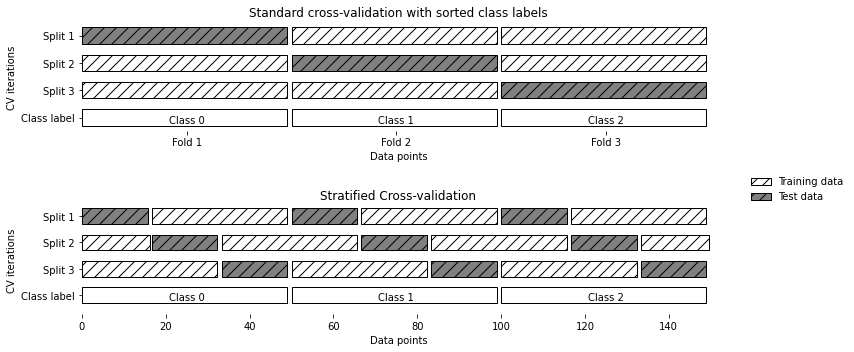

In [7]:
mglearn.plots.plot_stratified_cross_validation()

## Больше контроля над перекрестной проверкой

In [8]:
k_fold = KFold(n_splits=5)

cross_val_score(clf, iris.data, iris.target, cv=k_fold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [9]:
k_fold = KFold(n_splits=3)

cross_val_score(clf, iris.data, iris.target, cv=k_fold)

array([0., 0., 0.])

In [10]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)

cross_val_score(clf, iris.data, iris.target, cv=k_fold)

array([0.98, 0.96, 0.96])

## Перекрестная проверка с исключением по одному

In [11]:
loo = LeaveOneOut()
scores = cross_val_score(clf, iris.data, iris.target, cv=loo)

scores.shape

(150,)

In [12]:
scores.mean()

0.9666666666666667

## Перекрестная проверка со случайными перестановками при разбиении

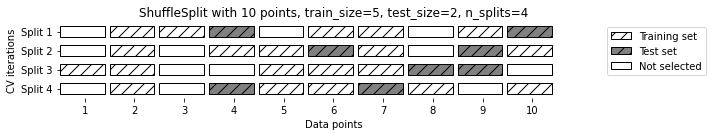

In [13]:
mglearn.plots.plot_shuffle_split()

In [14]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(clf, iris.data, iris.target, cv=shuffle_split)

scores

array([0.96      , 0.96      , 1.        , 0.94666667, 0.97333333,
       0.94666667, 0.97333333, 0.96      , 0.94666667, 0.96      ])

## Перекрестная проверка с использованием групп

In [15]:
X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(clf, X, y, groups, cv=GroupKFold(n_splits=3))

scores

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.75      , 0.6       , 0.66666667])

# Решетчатый поиск

## Простой решетчатый поиск

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    random_state=0
)

In [17]:
X_train.shape[0]

112

In [18]:
X_test.shape[1]

4

In [19]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        score = svm.score(X_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [20]:
best_score

0.9736842105263158

In [21]:
best_parameters

{'C': 100, 'gamma': 0.001}

## Опасность переобучения параметров и проверочный набор данных

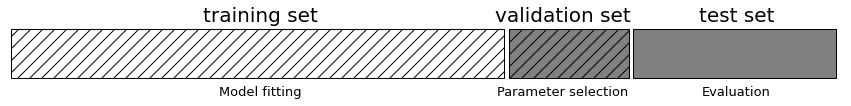

In [22]:
mglearn.plots.plot_threefold_split()

In [23]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1
)

In [24]:
X_train.shape[0]

84

In [25]:
X_valid.shape[0]

28

In [26]:
X_test.shape[0]

38

In [27]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

In [28]:
best_score

0.9642857142857143

In [29]:
best_parameters

{'C': 10, 'gamma': 0.001}

In [30]:
test_score

0.9210526315789473

## Решетчатый поиск с перекрестной проверкой

In [31]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)

        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

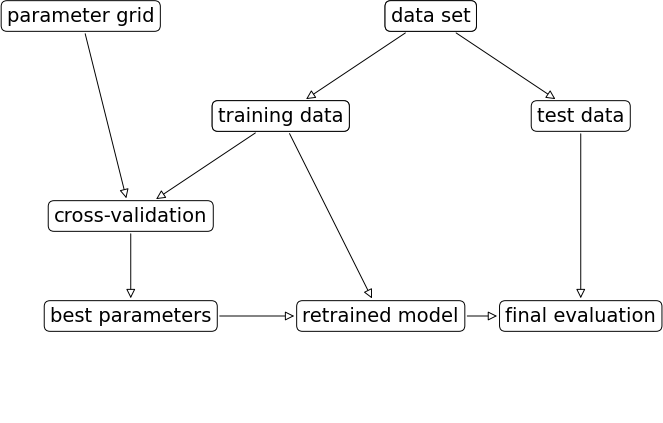

In [32]:
mglearn.plots.plot_grid_search_overview()

In [33]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [34]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [37]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [38]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [39]:
grid_search.best_score_

0.9731225296442687

In [40]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

## Анализ результатов перекрестной проверки

In [41]:
results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001097,0.000226,0.000523,0.000177,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000988,0.000206,0.000421,0.000047,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000893,0.000042,0.000388,0.000025,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000957,0.000145,0.000464,0.000112,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000835,0.000022,0.000381,0.000028,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


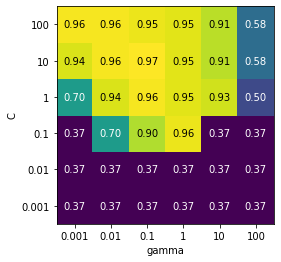

In [42]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(
    scores,
    xlabel='gamma',
    xticklabels=param_grid['gamma'],
    ylabel='C',
    yticklabels=param_grid['C'],
    cmap='viridis'
)

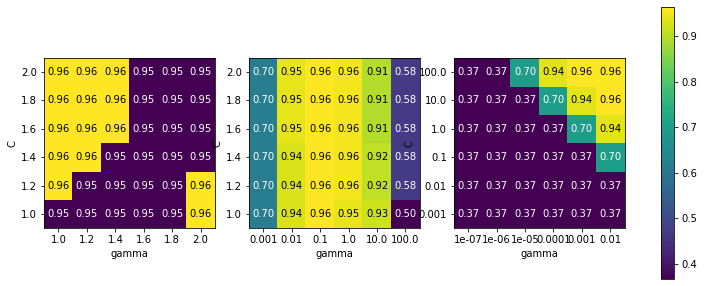

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}
param_grid_one_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}
param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

for param_grid, ax in zip(
    [param_grid_linear, param_grid_one_log, param_grid_range],
    axes
):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores,
        xlabel='gamma',
        ylabel='C',
        xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'],
        cmap='viridis',
        ax=ax
    )

plt.colorbar(scores_image, ax=axes.tolist())

## Экономичный решетчатый поиск

In [44]:
param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    }, {
        'kernel': ['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [45]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [46]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
grid_search.best_score_

0.9731225296442687

In [48]:
results = pd.DataFrame(grid_search.cv_results_)

In [49]:
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000868559,0.000875568,0.000883484,0.00104728,0.000823069,0.000840807,0.000820684,0.000784969,0.000786352,0.000786591,...,0.000490618,0.000599527,0.000862074,0.000854969,0.000788355,0.000655794,0.000603199,0.000606251,0.000609016,0.000614834
std_fit_time,8.56818e-05,7.05272e-05,6.09337e-05,0.000188683,4.28516e-05,9.13576e-05,0.000101482,4.08893e-05,2.83698e-05,2.73017e-05,...,7.94675e-06,1.61609e-05,4.01972e-05,3.15636e-05,0.000138315,3.24801e-05,3.40466e-05,4.10843e-05,3.06178e-05,4.19545e-05
mean_score_time,0.000439215,0.000447369,0.000398159,0.000577259,0.000366831,0.000506783,0.000360489,0.000346851,0.000352001,0.000423145,...,0.000285196,0.000299215,0.000319624,0.000351334,0.000392008,0.000329447,0.000313425,0.000310326,0.000349474,0.000365543
std_score_time,8.92375e-05,7.83334e-05,5.23371e-05,0.000209989,1.14218e-05,0.00015336,1.6465e-05,1.05352e-05,2.74791e-05,6.30072e-05,...,1.68857e-06,5.01926e-06,1.32004e-05,4.22117e-05,6.99058e-05,2.44341e-05,1.38255e-05,5.99868e-06,4.62717e-05,5.36274e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


## Вложенная перекрестная проверка

In [50]:
scores = cross_val_score(
    GridSearchCV(
        SVC(),
        param_grid,
        cv=5
    ),
    iris.data,
    iris.target,
    cv=5
)

In [51]:
scores

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [52]:
scores.mean()

0.9666666666666668

In [53]:
def nested_cv(X, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]
            ):
                clf = classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

            mean_score = np.mean(cv_scores)

            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))

    return np.array(outer_scores)

In [54]:
scores = nested_cv(
    iris.data,
    iris.target,
    StratifiedKFold(5),
    StratifiedKFold(5),
    SVC,
    ParameterGrid(param_grid)
)

scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

# Метрики качества модели и их вычисление

## Несбалансированные наборы данных

In [55]:
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    y,
    random_state=0
)

In [56]:
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

In [57]:
np.unique(pred_most_frequent)

array([False])

In [58]:
dummy_majority.score(X_test, y_test)

0.8955555555555555

In [59]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)

In [60]:
tree.score(X_test, y_test)

0.9177777777777778

In [61]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

pred_dummy = dummy.predict(X_test)
dummy.score(X_test, y_test)

/usr/local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.8177777777777778

In [62]:
clf = LogisticRegression(C=.1)
clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9844444444444445

## Матрица ошибок

In [63]:
confusion = confusion_matrix(y_test, pred_clf)

confusion

array([[402,   1],
       [  6,  41]])

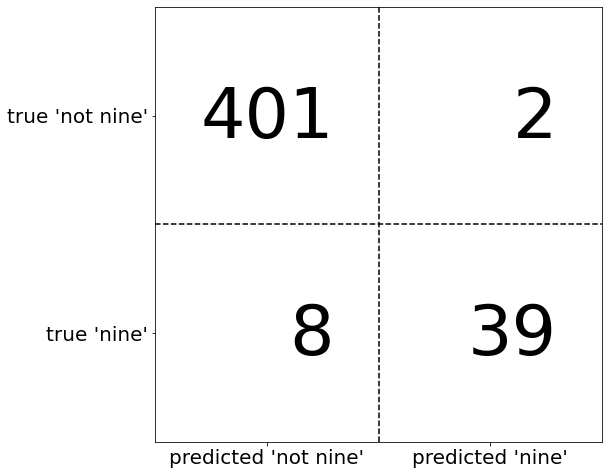

In [64]:
mglearn.plots.plot_confusion_matrix_illustration()

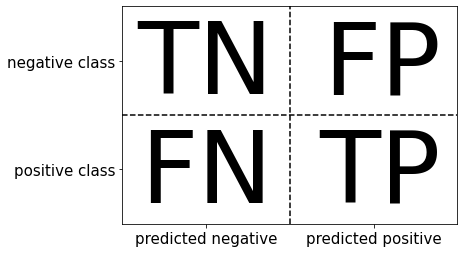

In [65]:
mglearn.plots.plot_binary_confusion_matrix()

In [66]:
confusion_matrix(y_test, pred_most_frequent)

array([[403,   0],
       [ 47,   0]])

In [67]:
confusion_matrix(y_test, pred_dummy)

array([[368,  35],
       [ 40,   7]])

In [68]:
confusion_matrix(y_test, pred_tree)

array([[390,  13],
       [ 24,  23]])

In [69]:
confusion_matrix(y_test, pred_clf)

array([[402,   1],
       [  6,  41]])

In [70]:
f1_score(y_test, pred_most_frequent)

0.0

In [71]:
f1_score(y_test, pred_dummy)

0.15730337078651685

In [72]:
f1_score(y_test, pred_tree)

0.5542168674698795

In [73]:
f1_score(y_test, pred_clf)

0.9213483146067415

In [74]:
classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine'])

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    not nine       0.90      1.00      0.94       403\n        nine       0.00      0.00      0.00        47\n\n    accuracy                           0.90       450\n   macro avg       0.45      0.50      0.47       450\nweighted avg       0.80      0.90      0.85       450\n'

In [75]:
classification_report(y_test, pred_dummy, target_names=['not nine', 'nine'])

'              precision    recall  f1-score   support\n\n    not nine       0.90      0.91      0.91       403\n        nine       0.17      0.15      0.16        47\n\n    accuracy                           0.83       450\n   macro avg       0.53      0.53      0.53       450\nweighted avg       0.83      0.83      0.83       450\n'

In [76]:
classification_report(y_test, pred_clf, target_names=['not nine', 'nine'])

'              precision    recall  f1-score   support\n\n    not nine       0.99      1.00      0.99       403\n        nine       0.98      0.87      0.92        47\n\n    accuracy                           0.98       450\n   macro avg       0.98      0.93      0.96       450\nweighted avg       0.98      0.98      0.98       450\n'

## Принимаем во внимание неопределенность

In [81]:
X, y = mglearn.datasets.make_blobs(
    n_samples=(400, 50),
    centers=2,
    cluster_std=[7.0, 2],
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

svc = SVC(gamma=.05)
svc.fit(X_train, y_train)

SVC(gamma=0.05)

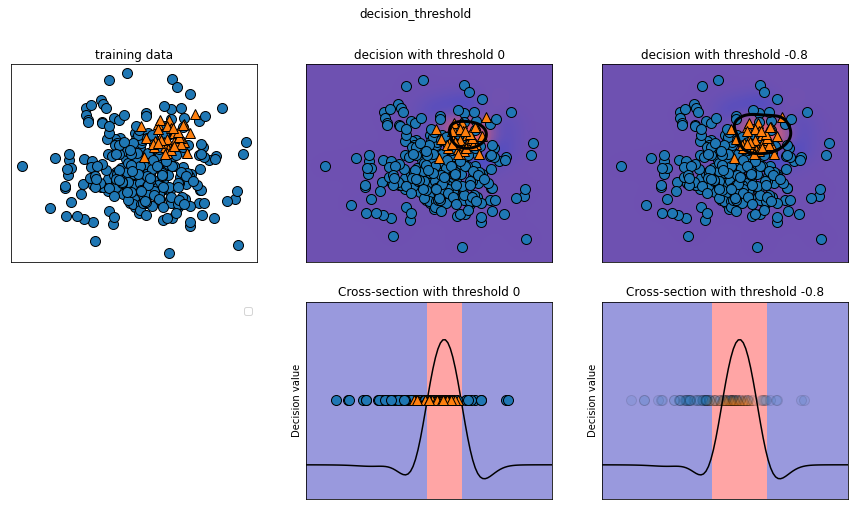

In [82]:
mglearn.plots.plot_decision_threshold()

In [83]:
classification_report(y_test, svc.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.97      0.89      0.93       104\n           1       0.35      0.67      0.46         9\n\n    accuracy                           0.88       113\n   macro avg       0.66      0.78      0.70       113\nweighted avg       0.92      0.88      0.89       113\n'

In [85]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [86]:
classification_report(y_test, y_pred_lower_threshold)

'              precision    recall  f1-score   support\n\n           0       1.00      0.82      0.90       104\n           1       0.32      1.00      0.49         9\n\n    accuracy                           0.83       113\n   macro avg       0.66      0.91      0.69       113\nweighted avg       0.95      0.83      0.87       113\n'

## Кривые точности-полноты и ROC-кривые

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


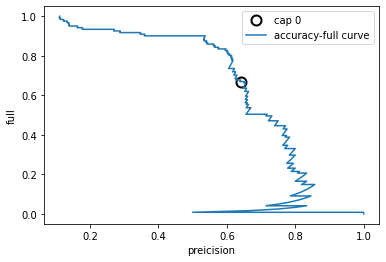

In [91]:
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

X, y = mglearn.datasets.make_blobs(
    n_samples=(4000, 500),
    centers=2,
    cluster_std=[7.0, 2],
    random_state=22
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)

svc = SVC(gamma=.05)
svc.fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    precision[close_zero],
    recall[close_zero],
    'o',
    markersize=10,
    label='cap 0',
    fillstyle='none',
    c='k',
    mew=2
)

plt.plot(precision, recall, label='accuracy-full curve')

plt.xlabel('preicision')
plt.ylabel('full')

plt.legend(loc='best')

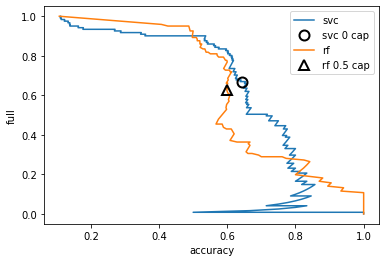

In [93]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test,
    rf.predict_proba(X_test)[:, 1]
)

plt.plot(precision, recall, label='svc')
plt.plot(
    precision[close_zero],
    recall[close_zero],
    'o',
    markersize=10,
    label='svc 0 cap',
    fillstyle='none',
    c='k',
    mew=2
)
plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(
    precision_rf[close_default_rf],
    recall_rf[close_default_rf],
    '^',
    c='k',
    markersize=10,
    label='rf 0.5 cap',
    fillstyle='none',
    mew=2
)

plt.xlabel('accuracy')
plt.ylabel('full')

plt.legend(loc='best')

In [94]:
f1_score(y_test, rf.predict(X_test))

0.6097560975609757

In [95]:
f1_score(y_test, svc.predict(X_test))

0.6558704453441295

In [97]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])

ap_rf

0.659559370099291

In [98]:
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

ap_svc

0.6663140319391998

## Рабочая характеристика приемника (ROC) и AUC

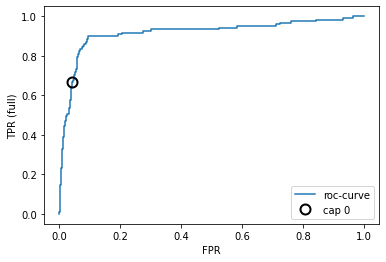

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='roc-curve')

plt.xlabel('FPR')
plt.ylabel('TPR (full)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    fpr[close_zero],
    tpr[close_zero],
    'o',
    markersize=10,
    label='cap 0',
    fillstyle='none',
    c='k',
    mew=2
)

plt.legend(loc=4)

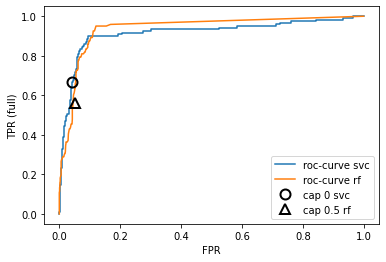

In [103]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='roc-curve svc')
plt.plot(fpr_rf, tpr_rf, label='roc-curve rf')

plt.xlabel('FPR')
plt.ylabel('TPR (full)')

plt.plot(
    fpr[close_zero],
    tpr[close_zero],
    'o',
    markersize=10,
    label='cap 0 svc',
    fillstyle='none',
    c='k',
    mew=2
)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(
    fpr_rf[close_default_rf],
    tpr[close_default_rf],
    '^',
    markersize=10,
    label='cap 0.5 rf',
    fillstyle='none',
    c='k',
    mew=2
)

plt.legend(loc=4)

In [106]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

rf_auc

0.9366953672911659

In [107]:
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

svc_auc

0.9162935036712654

gamma = 1 precision = 0.8955555555555555 AUC = 0.5
gamma = 0.05 precision = 0.8955555555555555 AUC = 0.9992080671559052
gamma = 0.01 precision = 0.8955555555555555 AUC = 0.999524840293543


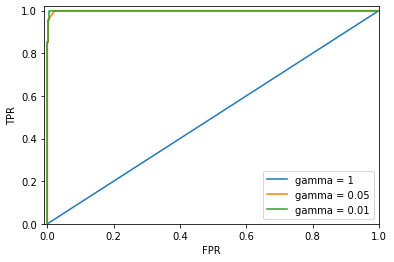

In [109]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0
)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    
    print(f'gamma = {gamma} precision = {accuracy} AUC = {auc}')
    
    plt.plot(fpr, tpr, label=f'gamma = {gamma}')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)

plt.legend(loc='best')

## Метрики для мультиклассовой классификации

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0
)

lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

In [115]:
accuracy_score(y_test, pred)

0.9533333333333334

In [116]:
confusion_matrix(y_test, pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]])

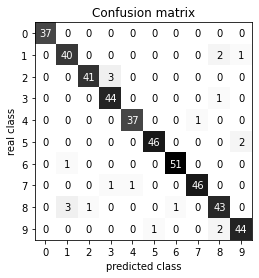

In [118]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred),
    xlabel='predicted class',
    ylabel='real class',
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
    cmap=plt.cm.gray_r, fmt='%d'
)

plt.title('Confusion matrix')
plt.gca().invert_yaxis()

In [119]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        37\n           1       0.91      0.93      0.92        43\n           2       0.98      0.93      0.95        44\n           3       0.92      0.98      0.95        45\n           4       0.97      0.97      0.97        38\n           5       0.98      0.96      0.97        48\n           6       0.98      0.98      0.98        52\n           7       0.98      0.96      0.97        48\n           8       0.90      0.90      0.90        48\n           9       0.94      0.94      0.94        47\n\n    accuracy                           0.95       450\n   macro avg       0.95      0.95      0.95       450\nweighted avg       0.95      0.95      0.95       450\n'

In [120]:
f1_score(y_test, pred, average='micro')

0.9533333333333334

In [121]:
f1_score(y_test, pred, average='macro')

0.9542564253775861

## Использование метрик оценки для отбора модели

In [122]:
cross_val_score(SVC(), digits.data, digits.target == 9)

array([0.975     , 0.99166667, 1.        , 0.99442897, 0.98050139])

In [124]:
cross_val_score(
    SVC(),
    digits.data,
    digits.target == 9,
    scoring='accuracy'
)

array([0.975     , 0.99166667, 1.        , 0.99442897, 0.98050139])

In [125]:
cross_val_score(
    SVC(),
    digits.data,
    digits.target == 9,
    scoring='roc_auc'
)

array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target == 9,
    random_state=0
)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'gamma': [0.0001, 0.01, 0.1, 1, 10]})

In [127]:
grid.best_params_

{'gamma': 0.0001}

In [128]:
grid.best_score_

0.975500481894534

In [129]:
roc_auc_score(y_test, grid.decision_function(X_test))

0.9919222849902327

In [130]:
grid.score(X_test, y_test)

0.9733333333333334

In [131]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)

grid.best_params_

{'gamma': 0.01}

In [132]:
grid.best_score_

0.997999457969529

In [133]:
roc_auc_score(y_test, grid.decision_function(X_test))

0.999524840293543

In [135]:
grid.score(X_test, y_test)

0.999524840293543

In [139]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']